<a href="https://colab.research.google.com/github/aarakova/VvAD/blob/lab4/%D0%9B%D0%A04_%D0%A0%D0%B0%D0%BA%D0%BE%D0%B2%D0%B0_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4 Кластеризация
**Цель работы:** изучение алгоритмов и методов кластеризации на практике.

Загрузка набора данных и предварительная обработка

In [2]:
import pandas as pd

# Загрузка данных
file_path = "5gym_churn.csv"
df = pd.read_csv(file_path)

# Просмотр первых 10 строк данных для анализа
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Обработка данных. Первым делом проверим данные на наличие пропусков и общую информацию о наборе данных, а также проведем проверку типов данных и преобразуем типы в числовые при необходимости

In [6]:
missing_values = df.isnull().sum()
df_info = df.info()

missing_values, df_info

df.dtypes

df = df.apply(pd.to_numeric, errors='coerce')

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,0
gender,0
Near_Location,0
Partner,0
Promo_friends,0
Phone,0
Contract_period,0
Group_visits,0
Age,0
Avg_additional_charges_total,0
Month_to_end_contract,0


В данных отсутствуют пропуски, и все признаки имеют корректные типы данных:
* Целочисленные признаки (например, gender, Partner).
* Вещественные признаки (например, Avg_additional_charges_total).

Следующим шагом была построена диаграмма рассеяния для визуализации распределения данных относительно целевой переменной Churn.

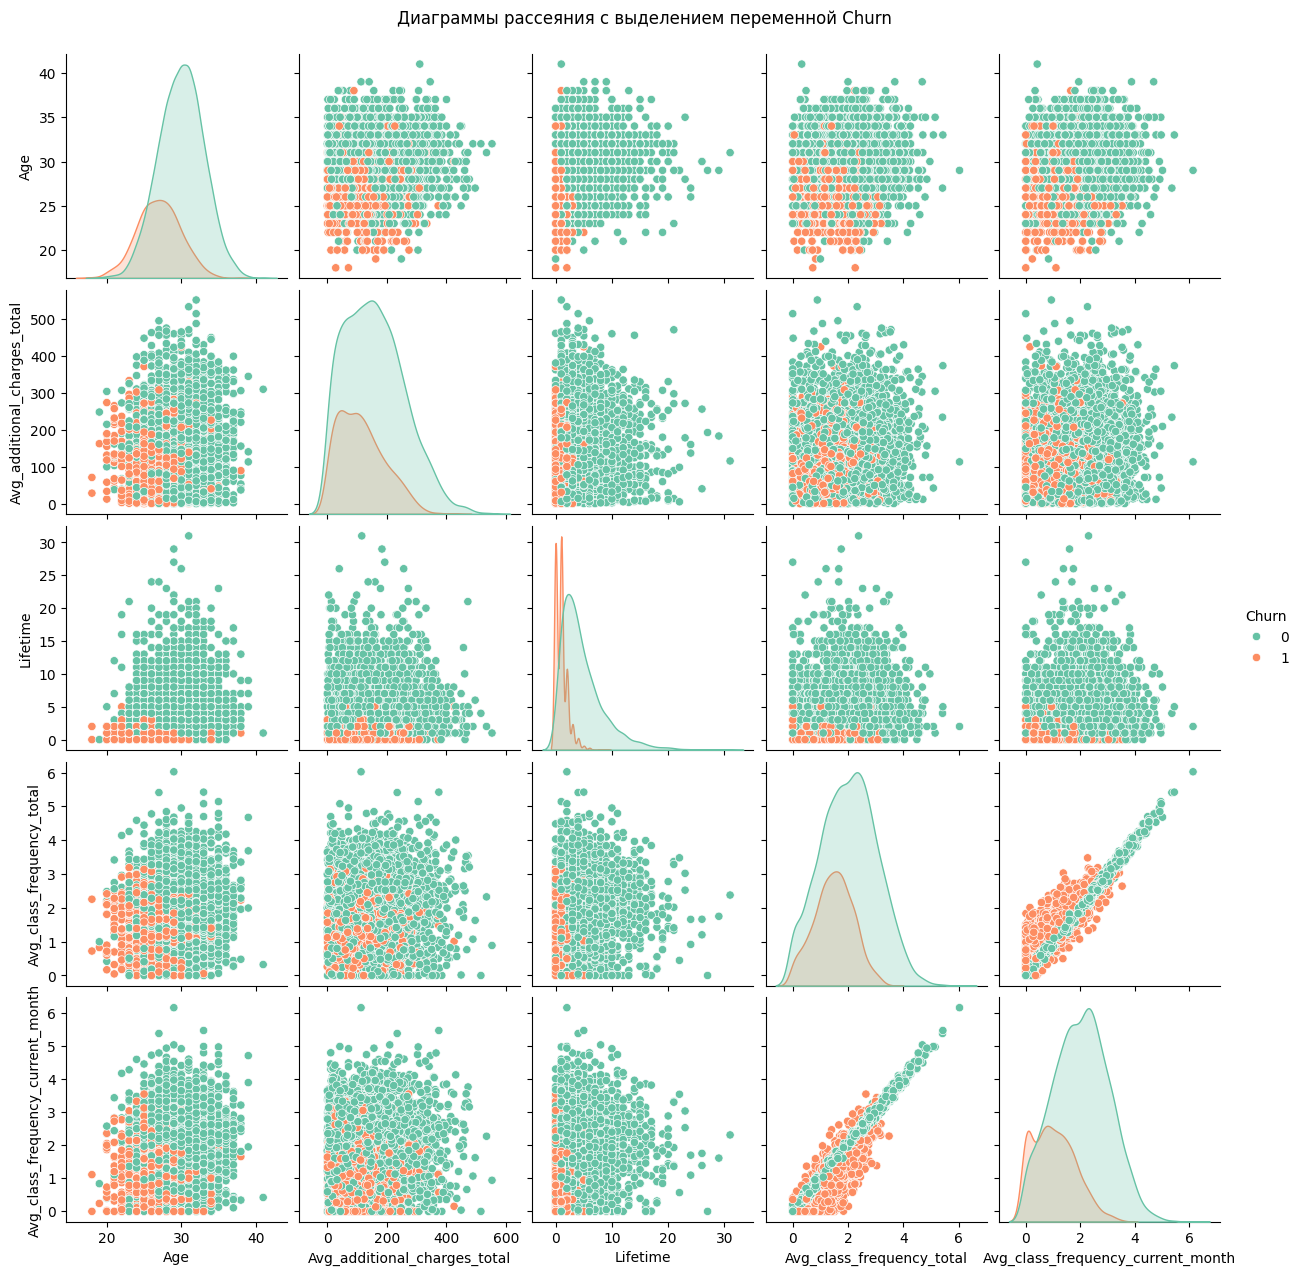

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=["Age", "Avg_additional_charges_total", "Lifetime",
                         "Avg_class_frequency_total", "Avg_class_frequency_current_month"],
             hue="Churn", diag_kind="kde", palette="Set2")

plt.suptitle("Диаграммы рассеяния с выделением переменной Churn", y=1.02)
plt.show()

Следующим шагом была выполнена стандартизация числовых данных

In [8]:
from sklearn.preprocessing import StandardScaler

# Выделение числовых признаков для стандартизации (исключая Churn)
features = df.drop(columns=["Churn"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Преобразование обратно в DataFrame для удобства
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df["Churn"] = df["Churn"].values  # Добавление целевой переменной

scaled_df.head(10)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472,0
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014,0
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019,0
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450,0
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542,0
5,0.979706,0.427881,-0.973842,-0.667931,0.326813,-0.809219,1.194032,1.478149,3.153301,-0.792873,-0.193329,0.765805,0.826346,0
6,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,0.864268,-0.546766,0.400224,-0.460081,-0.761301,-0.465257,0
7,-1.020715,0.427881,-0.973842,-0.667931,0.326813,-0.809219,-0.837498,0.250387,0.735316,-0.792873,-0.993585,-0.684602,-0.681689,1
8,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,1.194032,-1.898197,-1.053872,-0.792873,-0.726833,-0.794941,-0.672242,0
9,-1.020715,0.427881,-0.973842,-0.667931,0.326813,-0.809219,-0.837498,0.557327,-0.847310,-0.792873,1.940689,-0.070123,0.175076,0
